# Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Loading the dataset

In [2]:
#Load the dataset
dataset = pd.read_csv("Dataset.csv")

# Data Preprocessing

In [6]:
#First 5 rows in the dataframe
dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [7]:
#Finding the number of rows and columns
dataset.shape

(8950, 18)

In [8]:
#Getting information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [9]:
#Checking for missing values
dataset.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
# 1. Handling missing values
# 1_ Drop non-nemeric columns like "CUST_ID"
if "CUST_ID" in dataset.columns:
  dataset.drop(columns = ["CUST_ID"], inplace = True)

# 2) Ensure all columns are numeric before filling missing values
#Fill missing values with the median of each numeric column
numeric_columns = dataset.select_dtypes(include = ['float64','int64']).columns
dataset[numeric_columns] = dataset[numeric_columns].fillna(dataset[numeric_columns].median())

# 2. Feature Engineering
# 1) Average transaction amount per month
# Assuming 'TENURE' is in months, calculate average transaction amount
dataset['AVG_TRANSACTION_AMOUNT'] = dataset['PURCHASES'] / dataset['TENURE']

# 2) Total credit used vs. credit limit
dataset['TOTAL_CREDIT_USED'] = dataset['BALANCE'] + dataset['CASH_ADVANCE']  # total credit used is the balance + cash advance
dataset['CREDIT_USED_RATIO'] = dataset['TOTAL_CREDIT_USED'] / dataset['CREDIT_LIMIT']  # ratio of credit used to credit limit

# 3) Frequency of transactions
# Calculate frequency of transactions as the total transactions made divided by the tenure
dataset['TRANSACTION_FREQUENCY'] = dataset['PURCHASES_TRX'] / dataset['TENURE']

# 3. Feature Scaling: Use StandardScaler to standardize numerical features
scaler = StandardScaler()
scaler_data = scaler.fit_transform(dataset[numeric_columns])

# Convert the scaled data back to DataFrame for later use
scaler_data_df = pd.DataFrame(scaler_data, columns = numeric_columns)

# Displaying the
print('Dataset with new feature')
print(dataset.head())
print("\nScaled Dataset")
print(scaler_data_df.head())



Dataset with new feature
       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.00

# Exploratory Data Analysis (EDA)



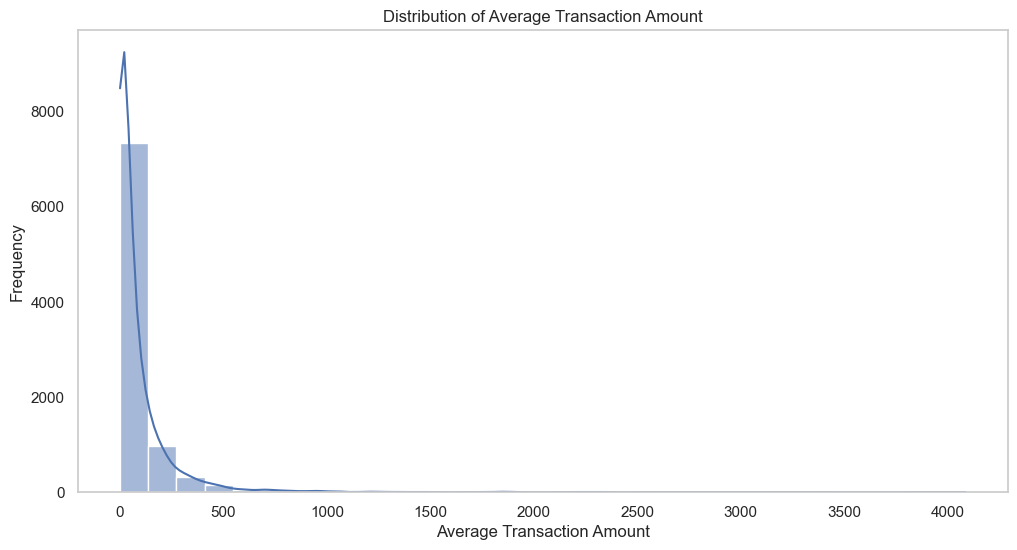

In [11]:
# setting plots style
sns.set(style = "whitegrid")

# 1. Histograms for distribution of transaction amounts
plt.figure(figsize=(12, 6))
sns.histplot(dataset['AVG_TRANSACTION_AMOUNT'], bins=30, kde=True)
plt.title('Distribution of Average Transaction Amount')
plt.xlabel('Average Transaction Amount')
plt.ylabel('Frequency')
plt.grid()
plt.show()


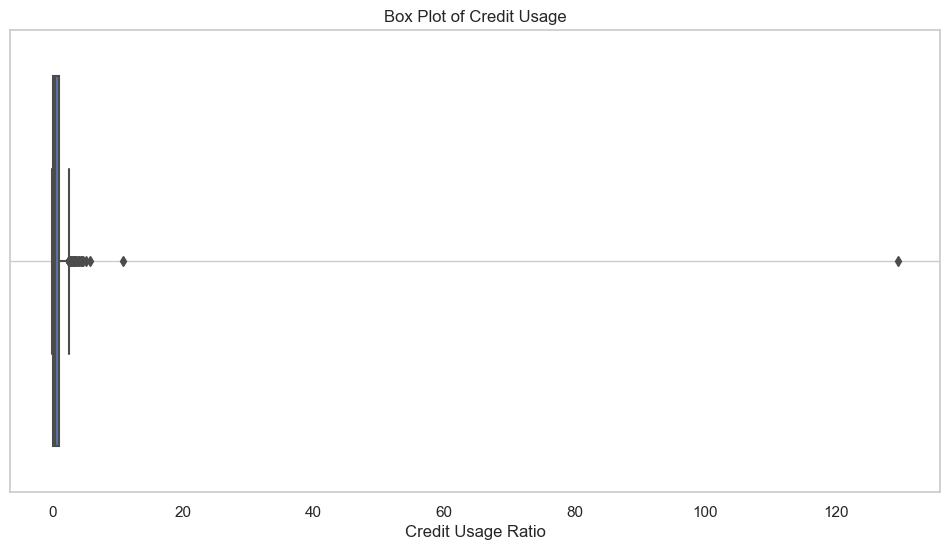

In [12]:
# 2. Box plots to identify outliers in credit usage
plt.figure(figsize=(12, 6))
sns.boxplot(x=dataset['CREDIT_USED_RATIO'])
plt.title('Box Plot of Credit Usage')
plt.xlabel('Credit Usage Ratio')
plt.grid()
plt.show()

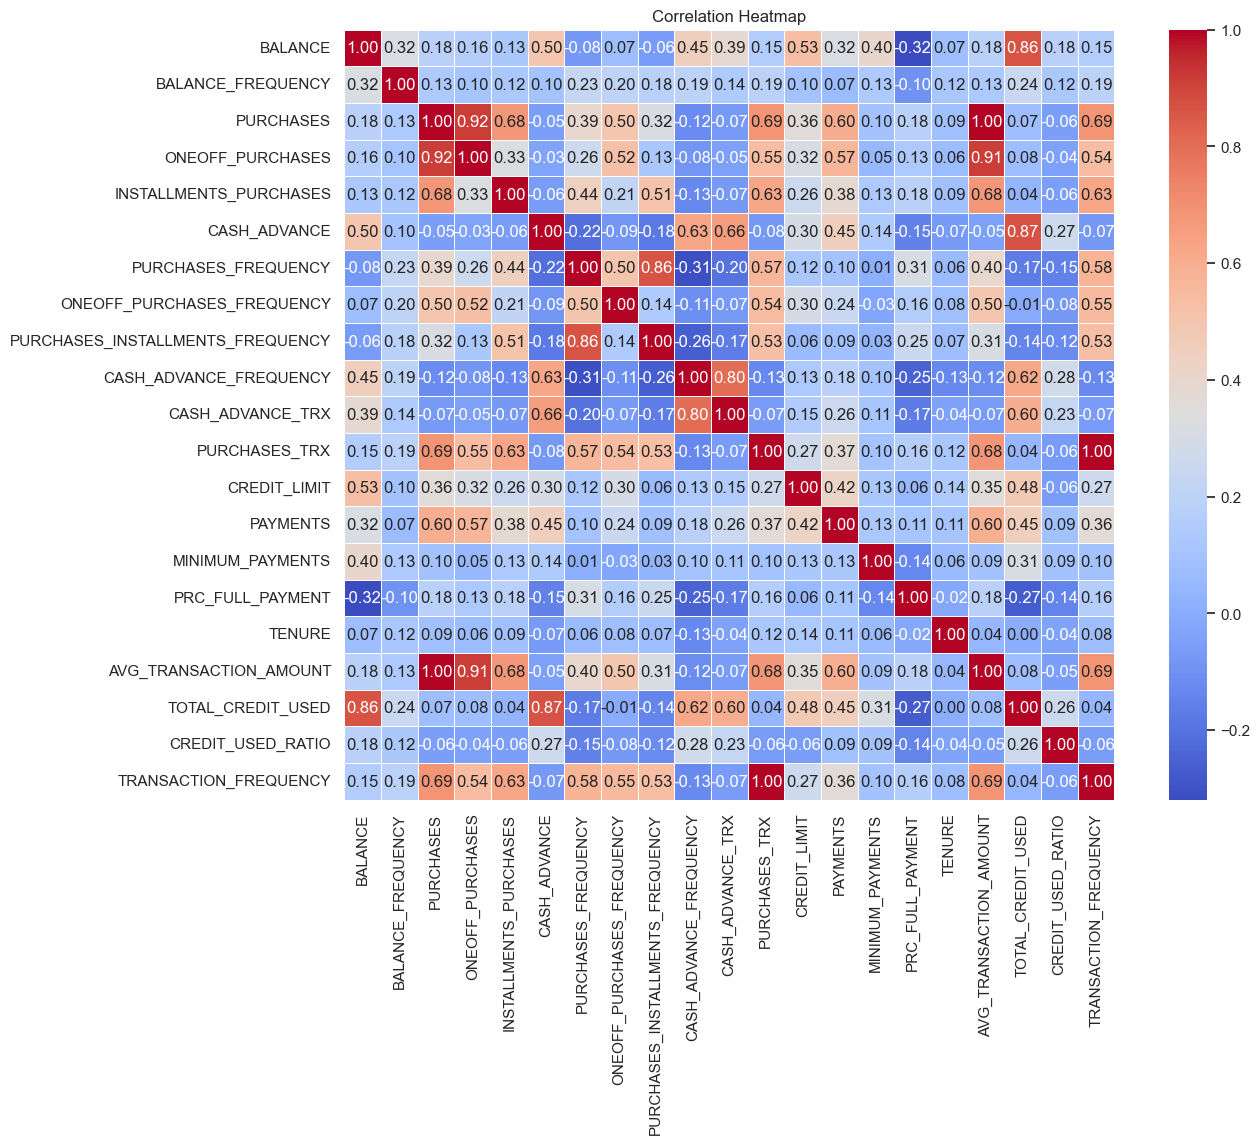

In [11]:
# 3. Heatmap to visualize correlations between features
plt.figure(figsize=(14, 10))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

In [13]:
# 4. Analyze spending patterns and transaction frequencies
# Create a summary DataFrame for spending patterns
spending_summary = dataset[['CREDIT_LIMIT', 'BALANCE', 'PAYMENTS', 'AVG_TRANSACTION_AMOUNT', 'TRANSACTION_FREQUENCY']].describe()
print("Spending Summary:\n", spending_summary)

Spending Summary:
        CREDIT_LIMIT       BALANCE      PAYMENTS  AVG_TRANSACTION_AMOUNT  \
count   8950.000000   8950.000000   8950.000000             8950.000000   
mean    4494.282473   1564.474828   1733.143852               86.175173   
std     3638.646702   2081.531879   2895.063757              180.508787   
min       50.000000      0.000000      0.000000                0.000000   
25%     1600.000000    128.281915    383.276166                3.399375   
50%     3000.000000    873.385231    856.901546               31.936667   
75%     6500.000000   2054.140036   1901.134317               97.228333   
max    30000.000000  19043.138560  50721.483360             4086.630833   

       TRANSACTION_FREQUENCY  
count            8950.000000  
mean                1.258932  
std                 2.090500  
min                 0.000000  
25%                 0.083333  
50%                 0.666667  
75%                 1.500000  
max                29.833333  


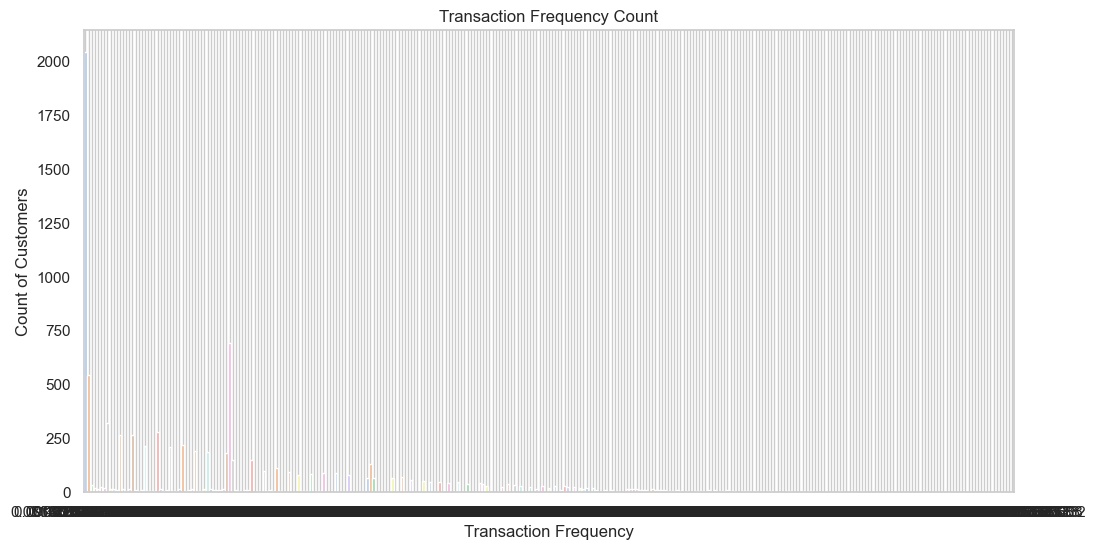

In [14]:
# 5. Segment analysis based on transaction frequency
plt.figure(figsize=(12, 6))
sns.countplot(x='TRANSACTION_FREQUENCY', data=dataset, palette='pastel')
plt.title('Transaction Frequency Count')
plt.xlabel('Transaction Frequency')
plt.ylabel('Count of Customers')
plt.grid()
plt.show()

# Clustering

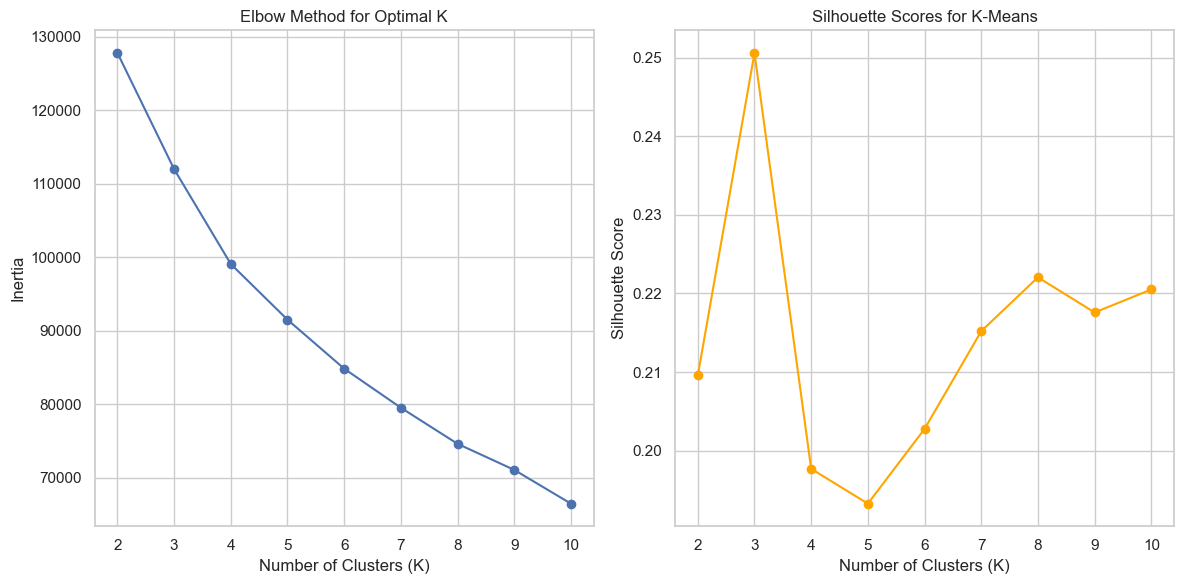

In [15]:
# 1. K-Means Clustering
# Use elbow method to find the optimal number of clusters
inertia = []
silhouette_scores_kmeans = []
K_range = range(2, 11)  # Evaluating for K from 2 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaler_data_df)
    inertia.append(kmeans.inertia_)
    silhouette_scores_kmeans.append(silhouette_score(scaler_data_df, kmeans.labels_))

# Plotting the Elbow Method
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

# Plotting Silhouette Scores for K-Means
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores_kmeans, marker='o', color='orange')
plt.title('Silhouette Scores for K-Means')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [17]:
# 2. DBSCAN Clustering
# Experiment with different values of epsilon and min_samples
epsilon_values = np.arange(0.1, 1.5, 0.1)
min_samples = [2, 3, 5]
silhouette_scores_dbscan = {}

for eps in epsilon_values:
    for min_samples_val in min_samples:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples_val)
        dbscan_labels = dbscan.fit_predict(scaler_data_df)
        if len(set(dbscan_labels)) > 1:  # Only compute score if there are at least 2 clusters
            silhouette_avg = silhouette_score(scaler_data_df, dbscan_labels)
            silhouette_scores_dbscan[(eps, min_samples_val)] = silhouette_avg
        else:
            silhouette_scores_dbscan[(eps, min_samples_val)] = -1  # Invalid silhouette score

# Display DBSCAN results
best_dbscan_params = max(silhouette_scores_dbscan, key=silhouette_scores_dbscan.get)
print(f"Best DBSCAN parameters: epsilon = {best_dbscan_params[0]}, min_samples = {best_dbscan_params[1]}")
print(f"Best silhouette score for DBSCAN: {silhouette_scores_dbscan[best_dbscan_params]}")

Best DBSCAN parameters: epsilon = 1.4000000000000001, min_samples = 5
Best silhouette score for DBSCAN: 0.046260534458481155


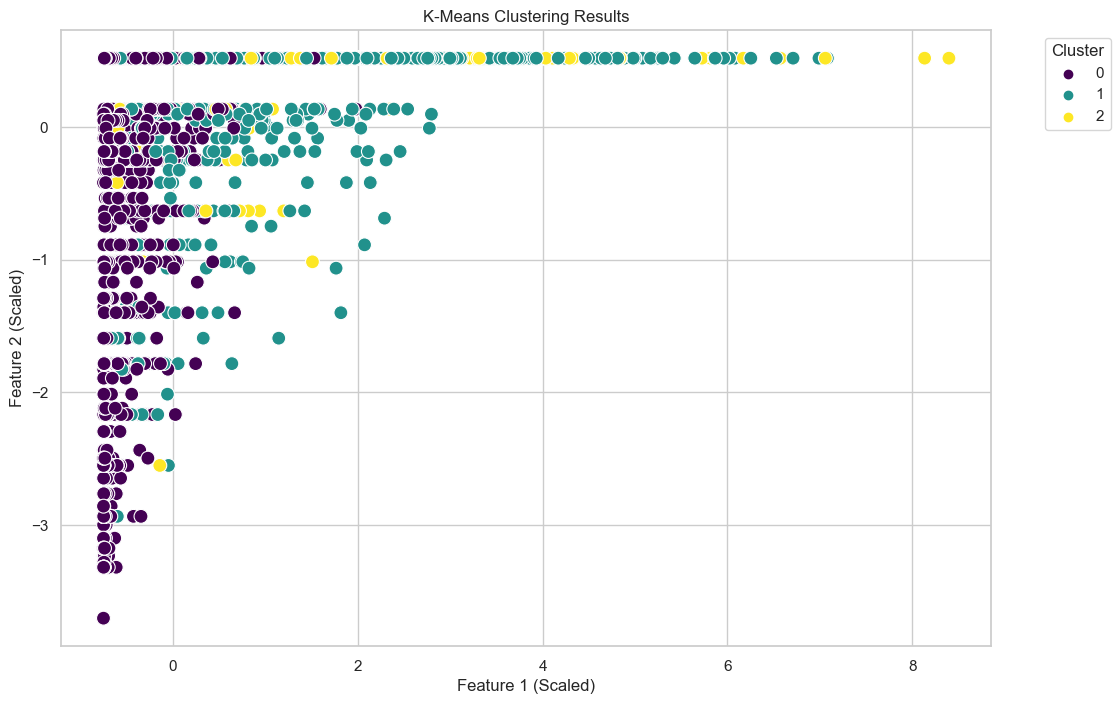

In [18]:
# 3. Visualizing the clusters for the optimal K-Means
optimal_k = silhouette_scores_kmeans.index(max(silhouette_scores_kmeans)) + 2  # +2 because range starts from 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaler_data_df)

# Visualizing K-Means Clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x=scaler_data_df.iloc[:, 0], y=scaler_data_df.iloc[:, 1], hue=kmeans_labels, palette='viridis', s=100)
plt.title('K-Means Clustering Results')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Cluster Profiling

In [19]:
# Add the cluster labels to your dataset
dataset['Cluster'] = kmeans_labels

In [21]:
# 1. Cluster Descriptions
cluster_profiles = dataset.groupby('Cluster').agg({
    'AVG_TRANSACTION_AMOUNT': 'mean',
    'TOTAL_CREDIT_USED': 'sum',
    'TRANSACTION_FREQUENCY': 'mean',
    'BALANCE': 'mean',
    'CREDIT_USED_RATIO': 'mean',
    'PURCHASES': 'sum',
    'PAYMENTS': 'sum'
}).reset_index()

cluster_profiles.columns = ['Cluster',
                            'Average Transaction Amount',
                            'Total Spending',
                            'Average Transaction Frequency',
                            'Average Balance',
                            'Average Credit Usage',
                            'Total Purchases',
                            'Total Payments']

print("Cluster Profiles:")
print(cluster_profiles)

Cluster Profiles:
   Cluster  Average Transaction Amount  Total Spending  \
0        0                   44.529207    6.917949e+06   
1        1                   34.583742    1.253714e+07   
2        2                  359.188604    3.307854e+06   

   Average Transaction Frequency  Average Balance  Average Credit Usage  \
0                       0.754013       799.750669              0.495362   
1                       0.496997      3989.142419              1.388533   
2                       4.745284      2220.003291              0.379216   

   Total Purchases  Total Payments  
0       3093352.72    5.566314e+06  
1        613707.13    4.818497e+06  
2       5271623.41    5.126826e+06  


In [22]:
# 2. Proposed Marketing Strategies
def marketing_strategy(row):
    if row['Total Spending'] > 10000:
        return "Premium rewards and exclusive offers."
    elif row['Total Spending'] > 5000:
        return "Targeted campaigns with personalized offers."
    elif row['Average Transaction Frequency'] < 1:
        return "Incentives for increased usage and cashback offers."
    else:
        return "Regular promotions and retention strategies."

cluster_profiles['Marketing Strategy'] = cluster_profiles.apply(marketing_strategy, axis=1)

# Displaying the cluster profiles with marketing strategies
print("\nCluster Profiles with Marketing Strategies:")
print(cluster_profiles)


Cluster Profiles with Marketing Strategies:
   Cluster  Average Transaction Amount  Total Spending  \
0        0                   44.529207    6.917949e+06   
1        1                   34.583742    1.253714e+07   
2        2                  359.188604    3.307854e+06   

   Average Transaction Frequency  Average Balance  Average Credit Usage  \
0                       0.754013       799.750669              0.495362   
1                       0.496997      3989.142419              1.388533   
2                       4.745284      2220.003291              0.379216   

   Total Purchases  Total Payments                     Marketing Strategy  
0       3093352.72    5.566314e+06  Premium rewards and exclusive offers.  
1        613707.13    4.818497e+06  Premium rewards and exclusive offers.  
2       5271623.41    5.126826e+06  Premium rewards and exclusive offers.  


In [23]:
#Define unique marketing strategies for each cluster
def unique_marketing_strategy(row):
    if row['Cluster'] == 0:  # High spenders
        return "Offer premium rewards and exclusive offers to enhance loyalty."
    elif row['Cluster'] == 1:  # Medium spenders
        return "Provide targeted campaigns with personalized offers to encourage higher spending."
    elif row['Cluster'] == 2:  # Low spenders with low frequency
        return "Implement incentives for increased usage, such as cashback offers."
    elif row['Cluster'] == 3:  # Regular users
        return "Introduce regular promotions to maintain engagement and retention."
    elif row['Cluster'] == 4:  # Infrequent users
        return "Encourage re-engagement with special offers for their next purchase."
    else:
        return "General marketing strategies aimed at increasing brand awareness."

# Apply the function to the cluster_profiles DataFrame
cluster_profiles['Unique Marketing Strategy'] = cluster_profiles.apply(unique_marketing_strategy, axis=1)

# Displaying the cluster profiles with unique marketing strategies
print("\nCluster Profiles with Unique Marketing Strategies:")
print(cluster_profiles[['Cluster', 'Unique Marketing Strategy']])


Cluster Profiles with Unique Marketing Strategies:
   Cluster                          Unique Marketing Strategy
0        0  Offer premium rewards and exclusive offers to ...
1        1  Provide targeted campaigns with personalized o...
2        2  Implement incentives for increased usage, such...


Principal Component Analysis (PCA)

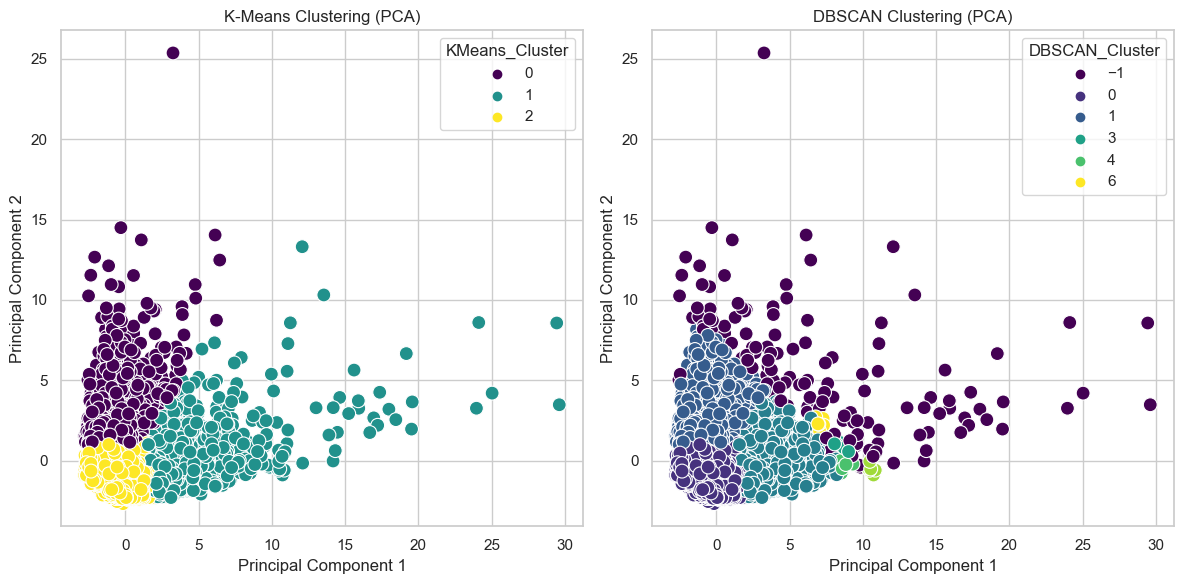

K-Means Silhouette Score (PCA): 0.452033842229268
DBSCAN Silhouette Score (PCA): 0.4085176815525181


In [24]:
# Step 1: Apply PCA
pca = PCA(n_components=2)  # Reducing to 2 dimensions for visualization
pca_data = pca.fit_transform(scaler_data_df)  # Assuming scaler_data_df is your scaled dataset

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])

# Step 2: Clustering on PCA-reduced data
# K-Means Clustering
kmeans_pca = KMeans(n_clusters=3, random_state=42)  # Adjust number of clusters as needed
pca_df['KMeans_Cluster'] = kmeans_pca.fit_predict(pca_df)

# DBSCAN Clustering
dbscan_pca = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
pca_df['DBSCAN_Cluster'] = dbscan_pca.fit_predict(pca_df)

# Step 3: Visualization of K-Means Clusters
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Step 4: Visualization of DBSCAN Clusters
plt.subplot(1, 2, 2)
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='viridis', s=100)
plt.title('DBSCAN Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

# Step 5: Evaluate Clustering Performance
# Silhouette Score for K-Means
kmeans_silhouette = silhouette_score(pca_df[['PCA1', 'PCA2']], pca_df['KMeans_Cluster'])
print(f"K-Means Silhouette Score (PCA): {kmeans_silhouette}")

# Silhouette Score for DBSCAN
# Since DBSCAN can produce noise points, filter them out
if len(set(pca_df['DBSCAN_Cluster'])) > 1:  # Ensure at least 2 clusters for silhouette score
    dbscan_silhouette = silhouette_score(pca_df[['PCA1', 'PCA2']], pca_df['DBSCAN_Cluster'])
    print(f"DBSCAN Silhouette Score (PCA): {dbscan_silhouette}")
else:
    print("DBSCAN did not form sufficient clusters for silhouette score evaluation.")